In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
import time 

In [3]:
# parameter 
a = 1
b = 0.5 
n = 100
xmin, xmax = 1, 10 

In [4]:
# function
import math
def f(x, a, b):
    return a*x + b

# numpy array를 다룰 수 있는 함수로 바꾸어준다.
# def f(x, a, b):
#     return math.sin(a*x + b)
vf = np.vectorize(f)

In [5]:
xs = np.random.uniform(xmin, xmax, size  = n )
ys = f(xs, a, b) + np.random.normal(0, 1, n )


In [6]:
ys

array([ 5.24868107,  3.42990423,  4.06010461,  5.00050376,  3.74258048,
        1.27862539,  8.00937341, 10.33148978,  5.22647276,  6.90559806,
        8.08669214,  4.3344375 ,  8.56870103,  5.60871569,  6.66395627,
        2.20998145,  8.19818588,  3.67281611,  2.70701891,  6.00584132,
        7.17349208, 11.30544883,  6.36072188,  7.47053352,  3.68388086,
        4.25748003,  4.79822875,  9.42227378,  4.02565444,  2.61338164,
        9.25771332,  4.46067896,  9.28396377,  3.46623029,  3.81419852,
        4.70080038,  9.94389571,  7.75766754,  8.81781157,  7.71035333,
        8.42919161,  9.03001155,  6.30060805,  2.26425447,  9.36463135,
        8.95642811, 11.59910625,  2.05352335,  7.8884804 , 10.0948538 ,
        5.28102977,  4.44633563,  6.91854615,  9.30111627, 10.00793029,
        6.25495197,  4.65338188,  8.8895961 , 10.42218611,  8.95808854,
        5.21108092,  8.74215956,  4.79915862,  7.22821525,  3.40747157,
        6.29903596,  7.03036989,  3.01498407,  7.16849256, 10.06

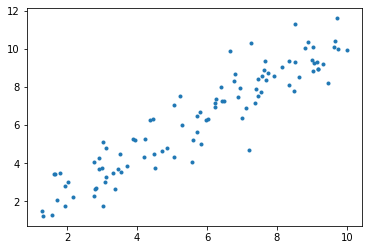

In [7]:
plt.plot(xs, ys, '.');

In [8]:
bestA, bestB = None, None
bestLoss = 1e9
t0 = time.time()
lossesBySearch = []
for aa in np.arange(-100, 100, 0.1):
    for bb in np.arange(-100, 100, 0.1):
        yys = f(xs, aa, bb)
        loss = ((yys - ys)**2).sum()
        lossesBySearch.append(loss)
        if loss < bestLoss : 
            bestA, bestB = aa, bb 
            bestLoss = loss
tf = time.time()
print('Truth :', a, b)
print('Fit results : ', bestA, bestB)
print('time : ', tf-t0)

Truth : 1 0.5
Fit results :  0.9999999999942588 0.5999999999942816
time :  42.46068286895752


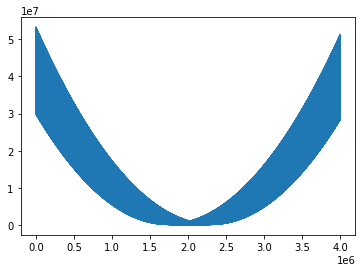

In [10]:
plt.plot(lossesBySearch);

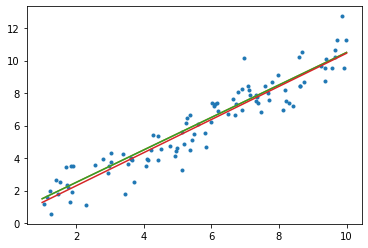

In [34]:
plt.plot(xs, ys, '.')
plt.plot([xmin, xmax], [f(xmin, a, b), f(xmax, a, b)]); 
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, bestA, bestB)
yTrue = f(xxs, a, b)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest);

In [32]:
def df_a(x, a, b):
    return a

def df_b(x, a, b):
    return 1 

def gradF(x, a, b):
    return (x, 1)


bestA, bestB = None, None
bestLoss = 1e9

t0 = time.time()
fitA, fitB = -100, -100

tf = time.time()
eta = 0.0001
lossesByGrad = []
for i in range(100000):
    yys = f(xs, fitA, fitB)
    gradA, gradB = gradF(xs, fitA, fitB)
    fitA = fitA - eta * ((yys - ys) * gradA ).sum()
    fitB = fitB - eta * ((yys - ys) * gradB ).sum()
    loss = ((yys - ys)**2).sum()
    lossesByGrad.append(loss)


print('Truth :', a, b)
print('Fit results : ', fitA, fitB)
print('time : ', tf-t0)

Truth : 1 0.5
Fit results :  0.9966967274610197 0.5727317529209719
time :  0.0


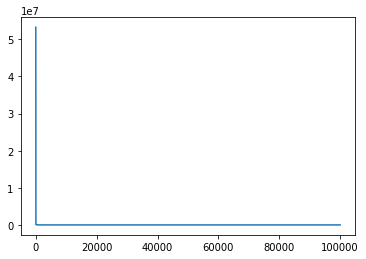

In [33]:
plt.plot(lossesByGrad);

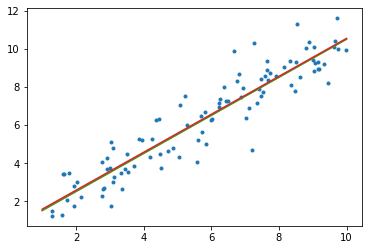

In [36]:
plt.plot(xs, ys, '.')
plt.plot([xmin, xmax], [f(xmin, a, b), f(xmax, a, b)]); 
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, fitA, fitB)
yTrue = f(xxs, a, b)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest);

2차함수

In [49]:
a = 1.234 
b = 5.678
c = 91.23

def f2(x, a, b, c):
    return a*x*x + b*x + c

def gradF(x, a, b, c):
    return (x*x, x, 1)

xmin = -10
xmax = 10
xs = np.random.uniform(xmin, xmax, n)
ys = f2(xs, a, b, c) + np.random.normal(0, 10, n)


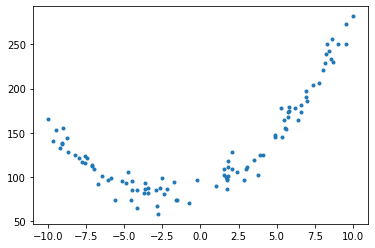

In [50]:
plt.plot(xs, ys, '.')

In [81]:
bestA, bestB, bestC = None, None, None
bestLoss = 1e9
t0 = time.time()
lossesBySearch = []
for aa in np.arange(0, 3, 0.1):
    for bb in np.arange(0, 10, 0.1):
        for cc in np.arange(80, 100, 0.1):
            yys = f(xs, aa, bb)
            loss = ((yys - ys)**2).sum()
            lossesBySearch.append(loss)
            if loss < bestLoss : 
                bestA, bestB, bestC = aa, bb, cc
            bestLoss = loss
tf = time.time()
print('Truth :', a, b)
print('Fit results : ', bestA, bestB)
print('time : ', tf-t0)

Truth : 1 1
Fit results :  2.9000000000000004 0.1
time :  7.584711790084839


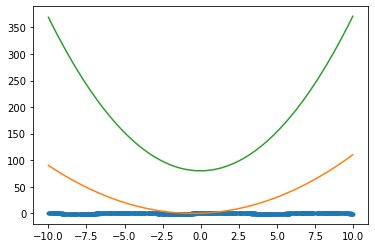

In [82]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yBest = f2(xxs, bestA, bestB, bestC)
yTrue = f2(xxs, a, b, c)
plt.plot(xxs, yTrue)
plt.plot(xxs, yBest);

In [55]:
t0 = time.time()
fitA, fitB, fitC = -10, -10, -10
eta = 1e-4
lossesByGrad = []

for i in range(10000):
    yys = f2(xs, fitA, fitB, fitC)
    gradA, gradB, gradC = gradF(xs, fitA, fitB, fitC)
    fitA = fitA - eta * ((yys - ys) *gradA).mean()
    fitB = fitB - eta * ((yys - ys) *gradB).mean()
    fitC = fitC - eta * ((yys - ys) *gradC).mean()
    loss = ((yys - ys)**2).sum()
    lossesByGrad.append(loss)

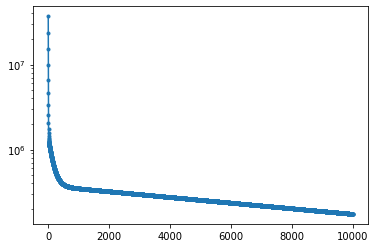

In [59]:
plt.yscale('log')
plt.plot(lossesByGrad, '.-');

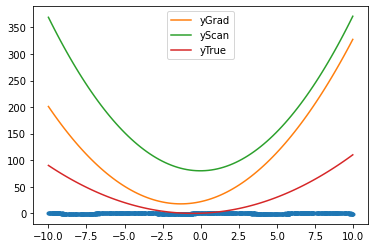

In [83]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yGrad = f2(xxs, fitA, fitB, fitC)
yScan = f2(xxs, bestA, bestB, bestC)
yTrue = f2(xxs, a, b, c)
plt.plot(xxs, yGrad, label = 'yGrad')
plt.plot(xxs, yScan, label = 'yScan')
plt.plot(xxs, yTrue, label = 'yTrue')
plt.legend();

In [72]:
a = 1
b = 1
c = 0.1

n = 1000
def sin_f(x, a, b, c):
    return a*np.sin(b*x + c)

# vf = np.vectorize(sin_f)

xs = np.random.uniform(xmin, xmax, n)
ys = sin_f(xs, a, b, c) + np.random.normal(0, 0.1, n)

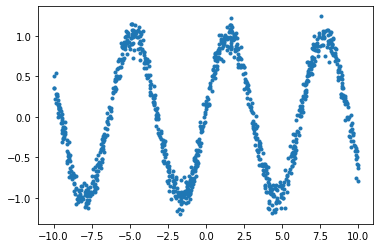

In [73]:
plt.plot(xs, ys, '.')

In [84]:
bestA, bestB, bestC = None, None, None
bestLoss = 1e9
t0 = time.time()
lossesBySearch = []
for aa in np.arange(0, 2, 0.1):
    for bb in np.arange(0, 2, 0.1):
        for cc in np.arange(0, 1, 0.1):
            yys = sin_f(xs, aa, bb, cc)
            loss = ((yys - ys)**2).sum()
            lossesBySearch.append(loss)
            if loss < bestLoss : 
                bestA, bestB, bestC = aa, bb, cc
                bestLoss = loss
tf = time.time()
print('Truth :', a, b)
print('Fit results : ', bestA, bestB)
print('time : ', tf-t0)

Truth : 1 1
Fit results :  1.0 1.0
time :  0.1735684871673584


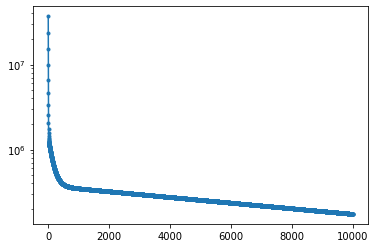

In [85]:
plt.yscale('log')
plt.plot(lossesByGrad, '.-');

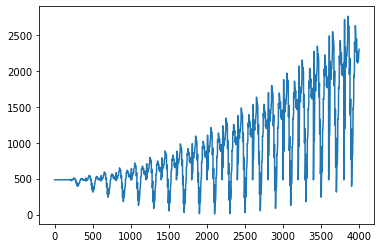

In [87]:
plt.plot(lossesBySearch);

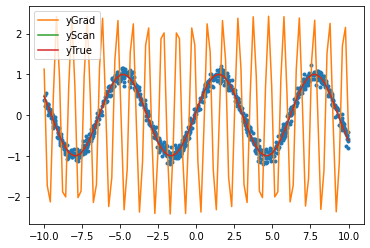

In [88]:
plt.plot(xs, ys, '.')
xxs = np.linspace(xmin, xmax, 100)
yGrad = sin_f(xxs, fitA, fitB, fitC)
yScan = sin_f(xxs, bestA, bestB, bestC)
yTrue = sin_f(xxs, a, b, c)
plt.plot(xxs, yGrad, label = 'yGrad')
plt.plot(xxs, yScan, label = 'yScan')
plt.plot(xxs, yTrue, label = 'yTrue')
plt.legend();